In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
database = automap_base()

# reflect the tables
database.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
database.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
# Save measurement and station
measurement = database.classes.measurement
station = database.classes.station

In [10]:
# Create our session (link) from Python to the DB
session_link = Session(engine)

# Exploratory Climate Analysis

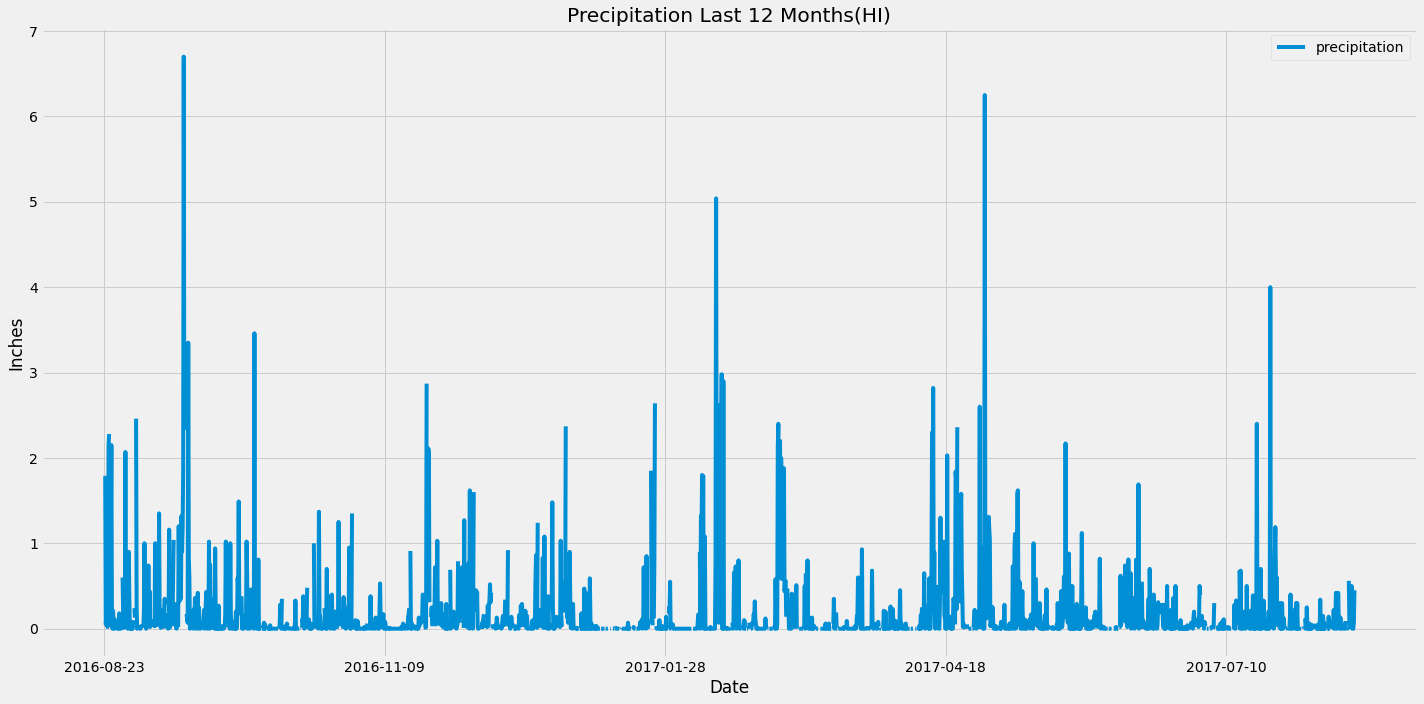

In [33]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
# Handle both with a query and a filter
precipitation_data_last12 = session_link.query(func.strftime("%Y-%m-%d", measurement.date), measurement.prcp).\
    filter(func.strftime("%Y-%m-%d", measurement.date) >= dt.date(2016, 8, 23)).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_data_last12_df = pd.DataFrame(precipitation_data_last12, columns = ['date', 'precipitation'])
precipitation_data_last12_df.set_index('date', inplace = True)

# Sort the dataframe by date
precipitation_data_last12_df = precipitation_data_last12_df.sort_values(by='date')
# precipitation_data_last12_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (20, 10))
precipitation_data_last12_df.plot(ax = ax, x_compat = True)

# Set axis and titles
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.set_title("Precipitation Last 12 Months(HI)")

# Plot and save the fig
plt.savefig("Images/precipitation_last_12_months.png")
plt.tight_layout()
plt.show()

In [34]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_data_last12_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [35]:
# Design a query to show how many stations are available in this dataset?
stations = session_link.query(station.id).distinct().count()
stations

9

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (session_link.query(measurement.station, func.count(measurement.station))
                        .group_by(measurement.station)
                        .order_by(func.count(measurement.station).desc())
                        .all())
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
# Grab all three temperatures with min, max and avg by filtering with the most active station
most_active_station = active_stations[0][0];
total_temps = session_link.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()
total_temps

[(54.0, 85.0, 71.66378066378067)]

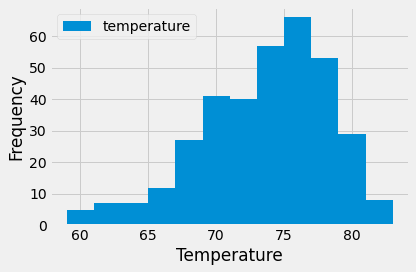

In [38]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
# Use most_active_station from the last cell
temp_obs_data = session_link.query(measurement.date, measurement.tobs).filter(measurement.station == most_active_station).\
    filter(func.strftime("%Y-%m-%d", measurement.date) >= dt.date(2016, 8, 23)).all()

# Dataframe and create axis labels
temp_obs_data_df = pd.DataFrame(temp_obs_data, columns = ['date', 'temperature'])
fig, ax = plt.subplots()
temp_obs_data_df.plot.hist(bins = 12, ax = ax)
ax.set_xlabel('Temperature')
ax.set_ylabel('Frequency')

# Plot and save the fig
plt.savefig("Images/Temperature Observation Histogram.png")
plt.tight_layout()
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
